# Evaluate Model with Data Generated for It

In [5]:
!ls ../resources/nmt_output/

en_ja  results.txt


In [9]:
!cat ../resources/nmt_output/results.txt

en_ja
------------------------------
jiji_onto_ami_conver_train_1-to-1_en_ja: 14.65
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1: 15.33
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2: 15.20
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_3: 14.98


In [77]:
import pandas as pd
import glob
from collections import defaultdict
import os
import sacrebleu
import matplotlib.pyplot as plt

In [25]:
def get_table(file_list):
    table = dict()
    for ref_file in file_list:
        key = os.path.split(ref_file)[-1].split('.')[0]
        hypo_file = os.path.splitext(ref_file)[0]
        table["reference"] = []
        table[key] = []
        with open(ref_file) as ref_source, open(hypo_file) as hypo_source:
            for ref, hypo in zip(ref_source, hypo_source):
                table["reference"].append(ref.strip())
                table[key].append((hypo.strip(), sacrebleu.corpus_bleu(hypo, ref).score))
    return pd.DataFrame(table)

In [26]:
en_ja = get_table(glob.glob("../resources/nmt_output/en_ja/*ref"))
ja_en = get_table(glob.glob("../resources/nmt_output/ja_en/*ref"))

In [39]:
[(key, *value) for key, value in dict(en_ja.loc[:, en_ja.columns != 'reference'].iloc[0]).items()]

[('jiji_onto_ami_conver_train_1-to-1_en_ja',
  'お願い でき ます か ?',
  5.862502026550896),
 ('jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1',
  'お願い でき ます か ?',
  5.862502026550896),
 ('jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2',
  'お願い でき ます か ?',
  5.862502026550896),
 ('jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_4',
  'お願い でき ます か ?',
  5.862502026550896),
 ('jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_5',
  'お願い でき ます か ?',
  5.862502026550896),
 ('jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_3',
  'お願い でき ます か ?',
  5.862502026550896)]

In [41]:
def get_oracle(table):
    results = []
    for _, row in table.loc[:, table.columns != 'reference'].iterrows():
        line = [(key, *value) for key, value in dict(row).items()]
        results.append(max(line, key=lambda x: x[-1])[:-1])
    return results

In [42]:
oracle_en_ja = get_oracle(en_ja)
oracle_ja_en = get_oracle(ja_en)

In [43]:
oracle_ja_en

[('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_1',
  'can i ask you for a second?'),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_5', 'okay.'),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_5',
  "i'm on a business trip to brazil next week."),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_5',
  "but honestly, i don't know about brazil."),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_5',
  'can you collect a little bit of materials on brazil?'),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_1',
  'what kind of material do you want?'),
 ('jiji_onto_ami_conver_train_1-to-1_ja_en',
  'yeah, the business partner in brazil is a forestry relationship, so it would be great if there is any information.'),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_5',
  "okay, it's a forestry industry in brazil."),
 ('jiji_onto_ami_conver_train_2-to-1_ja_en_context_bias_2',
  'do you have any information on the number of lumber or cutlets

In [74]:
def save_oracle(oracle, reference, save_path, suffix=""):
    with open(save_path + f'/oracle_table_{suffix}.tsv', 'w') as table, open(save_path + f'/oracle_{suffix}.sys', 'w') as target:
        table.write("model\treference\thypothesis\n")
        for (model, sys), ref in zip(oracle, reference):
            table.write('\t'.join((model, ref, sys)) + '\n')
            target.write(sys + '\n')
    return save_path + f'/oracle_table_{suffix}.tsv'

In [45]:
save_oracle(oracle_en_ja, en_ja['reference'], '../resources/nmt_output/en_ja')
save_oracle(oracle_ja_en, ja_en['reference'], '../resources/nmt_output/ja_en')

In [46]:
enja_table = pd.read_csv('../resources/nmt_output/en_ja/oracle_table.tsv', delimiter='\t')
jaen_table = pd.read_csv('../resources/nmt_output/ja_en/oracle_table.tsv', delimiter='\t')

In [56]:
enja_table

,model,reference,hypothesis
0,jiji_onto_ami_conver_train_1-to-1_en_ja,ちょっと お願い が ある ん だ が 。,お願い でき ます か ?
1,jiji_onto_ami_conver_train_1-to-1_en_ja,はい 。,もちろん 。
2,jiji_onto_ami_conver_train_2-to-1_en_ja_contex...,来週 ブラジル 出張 な ん だ 。,来週 ブラジル に 行く 予定 です 。
3,jiji_onto_ami_conver_train_2-to-1_en_ja_contex...,だが 、 正直 ブラジル について は よく 知ら なく て ね 。,でも 、 ブラジル に は よく 知ら ない ん です 。
4,jiji_onto_ami_conver_train_1-to-1_en_ja,ブラジル に関する 資料 を 少々 集め て くれ ない か な ?,ブラジル で 資料 を 集める こと は でき ます か ?
...,...,...,...
2115,jiji_onto_ami_conver_train_2-to-1_en_ja_contex...,僕 の 時 と も 違う 。,その 時 と は 違う ん です 。
2116,jiji_onto_ami_conver_train_2-to-1_en_ja_contex...,ますます 楽しみ だ な 。,もっと 楽しみ です ね 。
2117,jiji_onto_ami_conver_train_1-to-1_en_ja,この 先生 、 人気 ある ん です よ 。,彼 は 人気 講師 です 。
2118,jiji_onto_ami_conver_train_1-to-1_en_ja,ありがとう ござい ます 。,ありがとう ござい ます 。


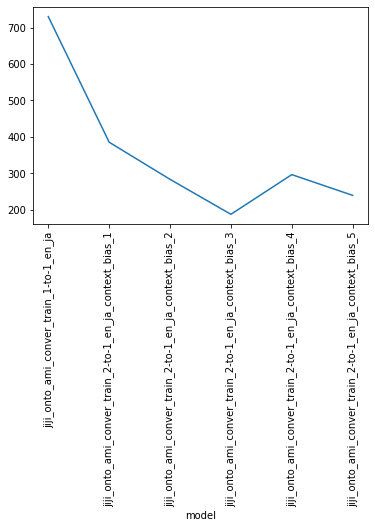

In [76]:
enja_table.groupby('model').count()['reference'].plot(rot=90)

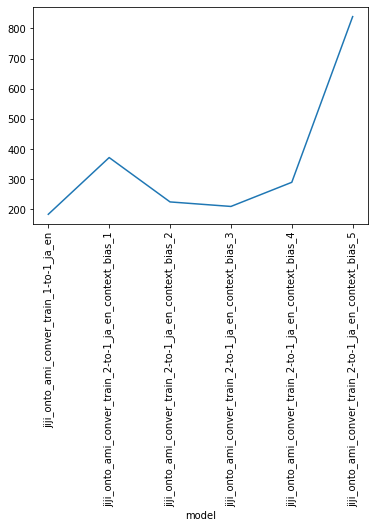

In [48]:
jaen_table.groupby('model').count()['reference'].plot(rot=90)

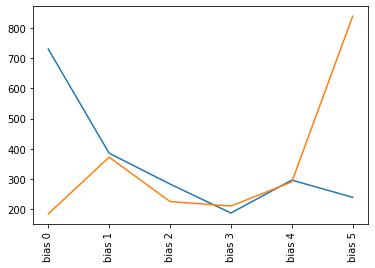

In [113]:
plt.xticks(rotation=90)
plt.plot([f"bias {index}" for index in range(0, 6)], enja_table.groupby('model').count()['reference'], label="enja")
plt.plot([f"bias {index}" for index in range(0, 6)], jaen_table.groupby('model').count()['reference'], label="jaen")

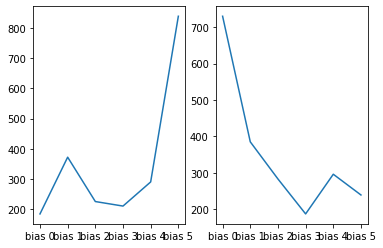

In [93]:
plt.subplot(1, 2, 1)
plt.plot([f"bias {index}" for index in range(0, 6)], jaen_table.groupby('model').count()['reference'], label="jaen")
plt.subplot(1, 2, 2)
plt.plot([f"bias {index}" for index in range(0, 6)], enja_table.groupby('model').count()['reference'], label="enja")

In [55]:
!cat ../resources/nmt_output/en_ja/oracle.sys | sacrebleu -b -w 2 ../resources/nmt_output/en_ja/jiji_onto_ami_conver_train_1-to-1_en_ja.ref
!cat ../resources/nmt_output/ja_en/oracle.sys | sacrebleu -b -w 2 ../resources/nmt_output/ja_en/jiji_onto_ami_conver_train_1-to-1_ja_en.ref

22.31
25.01


# Evaluate Model with All Kind of Data

In [68]:
!ls ../resources/hybird_nmt_output/en_ja

jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_1
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_1.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_2
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_2.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_3
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_3.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_4
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_4.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_5
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1_Bias_5.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2_Bias_1
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2_Bias_1.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2_Bias_2
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2_Bias_2.ref
jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2_Bias_3
jiji_onto_ami_conver_train_2-to-1_en_ja_co

In [99]:
os.path.splitext(glob.glob("../resources/hybird_nmt_output/en_ja/*ref")[0])

('../resources/hybird_nmt_output/en_ja/jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_4_Bias_3',
 '.ref')

In [101]:
for direction in ("en_ja", "ja_en"):
    for bias in range(1, 6):
        table = get_table(glob.glob(f"../resources/hybird_nmt_output/{direction}/*bias_{bias}*ref"))
        oracle = get_oracle(table)
        tsv_path = save_oracle(oracle, table["reference"], f"../resources/hybird_nmt_output/{direction}/", f"bias_{bias}_model")

In [102]:
for direction in ("en_ja", "ja_en"):
    for bias in range(1, 6):
        table = get_table(glob.glob(f"../resources/hybird_nmt_output/{direction}/*Bias_{bias}*ref"))
        oracle = get_oracle(table)
        tsv_path = save_oracle(oracle, table["reference"], f"../resources/hybird_nmt_output/{direction}/", f"bias_{bias}_data")

In [112]:
!cat ../resources/hybird_nmt_output/results.txt

en_ja
------------------------------
Model -> jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_1
	Data -> Bias_1: 15.33
	Data -> Bias_2: 15.08
	Data -> Bias_3: 15.00
	Data -> Bias_4: 15.18
	Data -> Bias_5: 14.92
Model -> jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_2
	Data -> Bias_1: 15.41
	Data -> Bias_2: 15.20
	Data -> Bias_3: 15.45
	Data -> Bias_4: 15.41
	Data -> Bias_5: 15.01
Model -> jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_3
	Data -> Bias_1: 15.31
	Data -> Bias_2: 15.40
	Data -> Bias_3: 14.98
	Data -> Bias_4: 15.22
	Data -> Bias_5: 14.94
Model -> jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_4
	Data -> Bias_1: 15.31
	Data -> Bias_2: 15.53
	Data -> Bias_3: 15.37
	Data -> Bias_4: 15.38
	Data -> Bias_5: 15.24
Model -> jiji_onto_ami_conver_train_2-to-1_en_ja_context_bias_5
	Data -> Bias_1: 15.46
	Data -> Bias_2: 15.44
	Data -> Bias_3: 15.43
	Data -> Bias_4: 15.50
	Data -> Bias_5: 15.43

ja_en
------------------------------
Model -> jiji_onto_ami_conver_

## Oracle scores for en -> ja

In [108]:
!find ../resources/hybird_nmt_output/en_ja -type f -name "*data.sys" | sort | xargs -I {} sh -c "echo {}; cat {} | sacrebleu -b -w 2 ../resources/hybird_nmt_output/en_ja/reference"

../resources/hybird_nmt_output/en_ja/oracle_bias_1_data.sys
21.66
../resources/hybird_nmt_output/en_ja/oracle_bias_2_data.sys
21.58
../resources/hybird_nmt_output/en_ja/oracle_bias_3_data.sys
21.49
../resources/hybird_nmt_output/en_ja/oracle_bias_4_data.sys
21.55
../resources/hybird_nmt_output/en_ja/oracle_bias_5_data.sys
21.41


In [109]:
!find ../resources/hybird_nmt_output/en_ja -type f -name "*model.sys" | sort | xargs -I {} sh -c "echo {}; cat {} | sacrebleu -b -w 2 ../resources/hybird_nmt_output/en_ja/reference"

../resources/hybird_nmt_output/en_ja/oracle_bias_1_model.sys
18.51
../resources/hybird_nmt_output/en_ja/oracle_bias_2_model.sys
18.71
../resources/hybird_nmt_output/en_ja/oracle_bias_3_model.sys
18.23
../resources/hybird_nmt_output/en_ja/oracle_bias_4_model.sys
18.31
../resources/hybird_nmt_output/en_ja/oracle_bias_5_model.sys
18.68


## Oracle scores for ja -> en

In [111]:
# Use n-biased data on every 2-to-1 system
!find ../resources/hybird_nmt_output/ja_en -type f -name "*data.sys" | sort | xargs -I {} sh -c "echo {}; cat {} | sacrebleu -b -w 2 ../resources/hybird_nmt_output/ja_en/reference"

../resources/hybird_nmt_output/ja_en/oracle_bias_1_data.sys
24.28
../resources/hybird_nmt_output/ja_en/oracle_bias_2_data.sys
24.08
../resources/hybird_nmt_output/ja_en/oracle_bias_3_data.sys
23.95
../resources/hybird_nmt_output/ja_en/oracle_bias_4_data.sys
23.90
../resources/hybird_nmt_output/ja_en/oracle_bias_5_data.sys
23.92


In [110]:
# Use every kind of biased data on each n-biased 2-to-1 system
!find ../resources/hybird_nmt_output/ja_en -type f -name "*model.sys" | sort | xargs -I {} sh -c "echo {}; cat {} | sacrebleu -b -w 2 ../resources/hybird_nmt_output/ja_en/reference"

../resources/hybird_nmt_output/ja_en/oracle_bias_1_model.sys
21.05
../resources/hybird_nmt_output/ja_en/oracle_bias_2_model.sys
20.79
../resources/hybird_nmt_output/ja_en/oracle_bias_3_model.sys
20.72
../resources/hybird_nmt_output/ja_en/oracle_bias_4_model.sys
20.75
../resources/hybird_nmt_output/ja_en/oracle_bias_5_model.sys
20.54
